In [53]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [50]:
%%time
from sklearn.neighbors import NearestNeighbors
import gc

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

CPU times: user 326 ms, sys: 22.9 ms, total: 349 ms
Wall time: 1.23 s


In [10]:
empresa1 = pd.read_csv('data/estaticos_portfolio1.csv', index_col=0)
empresa2 = pd.read_csv('data/estaticos_portfolio2.csv', index_col=0)
empresa3 = pd.read_csv('data/estaticos_portfolio3.csv', index_col=0)

In [11]:
mercado = pd.read_csv('data/simplificado.csv', index_col=0)

In [12]:
mercado.shape

(462298, 22)

In [13]:
mercado.columns

Index(['id', 'fl_matriz', 'sg_uf', 'natureza_juridica_macro', 'setor',
       'idade_empresa_anos', 'fl_sa', 'fl_mei', 'fl_email', 'fl_telefone',
       'fl_rm', 'fl_veiculo', 'fl_optante_simples',
       'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
       'fl_optante_simei', 'sg_uf_matriz', 'fl_passivel_iss',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'de_nivel_atividade_numerico'],
      dtype='object')

In [14]:
empresa1.shape

(555, 181)

In [15]:
empresa2.shape

(566, 1)

In [16]:
empresa3.shape

(265, 1)

In [17]:
mercado.head().T

,0,1,2,3,4
id,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...
fl_matriz,1,1,1,1,1
sg_uf,RN,PI,AM,AM,RN
natureza_juridica_macro,ENTIDADES EMPRESARIAIS,OUTROS,OUTROS,OUTROS,OUTROS
setor,CONSTRUÇÃO CIVIL,SERVIÇO,SERVIÇO,SERVIÇO,SERVIÇO
idade_empresa_anos,14.4575,1.46301,7.09315,6.51233,3.2
fl_sa,0,0,0,0,0
fl_mei,0,1,1,0,0
fl_email,1,1,0,1,1
fl_telefone,1,1,1,1,1


In [19]:
variaveis_categoricas = ['sg_uf', 'natureza_juridica_macro', 'setor', 'sg_uf_matriz']
mercado_dummies = pd.get_dummies(mercado[variaveis_categoricas])

In [20]:
mercado_dummies.shape

(462298, 46)

In [21]:
mercado_dummies.head()

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,...,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
mercado.drop(columns=variaveis_categoricas, inplace=True)

In [23]:
mercado = mercado.merge(mercado_dummies, left_index=True, right_index=True)

In [24]:
mercado.shape

(462298, 64)

In [117]:
mercado.head()

,id,fl_matriz,idade_empresa_anos,fl_sa,fl_mei,fl_email,fl_telefone,fl_rm,fl_veiculo,fl_optante_simples,...,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1,14.457534,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1,1.463014,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1,7.093151,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1,6.512329,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1,3.200000,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [105]:
empresa1_ajustada = empresa1.copy()
empresa1_ajustada['Cliente'] = int(1)
empresa1_ajustada = empresa1_ajustada[['id','Cliente']]

In [56]:
cliente_empresa1 = pd.merge(mercado, empresa1_ajustada, on='id', how='outer')

In [136]:
teste = pd.merge(mercado, empresa1_ajustada, on='id', how='right')

In [137]:
teste = teste.drop(['id','Cliente'], axis = 1)

In [138]:
teste.shape

(555, 63)

In [139]:
teste.isnull().sum()

fl_matriz                                                 0
idade_empresa_anos                                        0
fl_sa                                                     0
fl_mei                                                    0
fl_email                                                  0
fl_telefone                                               0
fl_rm                                                     0
fl_veiculo                                                0
fl_optante_simples                                        0
vl_total_veiculos_pesados_grupo                           0
vl_total_veiculos_leves_grupo                             0
fl_optante_simei                                          0
fl_passivel_iss                                           0
vl_faturamento_estimado_aux                               0
vl_faturamento_estimado_grupo_aux                         0
qt_filiais                                                0
de_nivel_atividade_numerico             

In [58]:
cliente_empresa1['Cliente'] = cliente_empresa1['Cliente'].fillna(0).astype(int)

In [59]:
X = cliente_empresa1.drop(['id','Cliente'], axis = 1)

In [60]:
y = cliente_empresa1['Cliente']

In [140]:
teste.head()

,fl_matriz,idade_empresa_anos,fl_sa,fl_mei,fl_email,fl_telefone,fl_rm,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,...,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO
0,1,0.646575,0,1,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,6.586301,0,0,1,1,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,8.010959,0,1,0,0,1,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,20.863014,0,0,0,0,0,0,1,0.0,...,0,0,1,0,0,0,0,0,0,0
4,1,18.726027,0,0,1,1,1,0,1,0.0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
X.head()

,fl_matriz,idade_empresa_anos,fl_sa,fl_mei,fl_email,fl_telefone,fl_rm,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,...,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO
0,1,14.457534,0,0,1,1,1,0,1,0.0,...,0,0,1,0,0,0,0,0,0,0
1,1,1.463014,0,1,1,1,1,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,7.093151,0,1,0,1,1,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,6.512329,0,0,1,1,1,0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,3.200000,0,0,1,1,1,0,1,0.0,...,0,0,1,0,0,0,0,0,0,0


In [132]:
X=(X-X.min())/(X.max()-X.min())
teste=(teste-teste.min())/(teste.max()-teste.min())

In [75]:
X.head()

,fl_matriz,idade_empresa_anos,fl_sa,fl_mei,fl_email,fl_telefone,fl_rm,fl_veiculo,fl_optante_simples,vl_total_veiculos_pesados_grupo,...,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO
0,1.0,0.135704,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.013594,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.066500,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.061042,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.029916,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


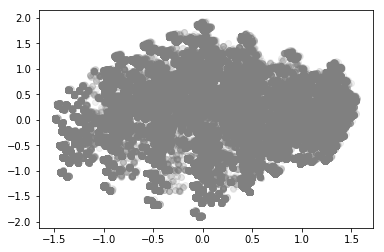

In [133]:
pca = PCA(n_components=2)

market_points = pca.fit_transform(X)
plt.scatter(market_points[:, 0], market_points[:, 1], c='gray', alpha=0.1);


In [134]:

pf1_points = pca.transform(teste)
plt.scatter(pf1_points[:, 0], pf1_points[:, 1], c='green', alpha=0.1);

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [76]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size = 0.7)

In [77]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((323608, 63), (138690, 63), (323608,), (138690,))

In [78]:
selector = SelectKBest(score_func=f_classif, k = 20)

In [79]:
Xtrain2 = selector.fit_transform(Xtrain, ytrain)

In [80]:
Xval2 = selector.transform(Xval)

In [81]:
modelo = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42)

In [82]:
modelo.fit(Xtrain2, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [83]:
previsao = modelo.predict(Xval2)

In [84]:
score = mean_absolute_error(yval, previsao)

In [85]:
k = 20

In [86]:
print( "K = {} - MAE = {}", k, score)

K = {} - MAE = {} 20 0.002580584029152987


In [87]:
K_vs_Score = []
for k in range(2, Xtrain.shape[1], 2):
    selector = SelectKBest(score_func=f_classif, k = k)
    Xtrain2 = selector.fit_transform(Xtrain, ytrain)
    Xval2 = selector.transform(Xval)
    modelo = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42)
    modelo.fit(Xtrain2, ytrain)
    previsao = modelo.predict(Xval2)
    score = mean_absolute_error(yval, previsao)
    print( "K = {} - MAE = {}", k, score)
    K_vs_Score.append(score)

K = {} - MAE = {} 2 0.002464394166049578
K = {} - MAE = {} 4 0.002465552218253012
K = {} - MAE = {} 6 0.0024651328296572805
K = {} - MAE = {} 8 0.0024656904929233727
K = {} - MAE = {} 10 0.0024657178829303778
K = {} - MAE = {} 12 0.002466049419729235
K = {} - MAE = {} 14 0.0024659154396192247
K = {} - MAE = {} 16 0.002465886582539601
K = {} - MAE = {} 18 0.0024674540563758107
K = {} - MAE = {} 20 0.002580584029152987
K = {} - MAE = {} 22 0.0025811742870703444
K = {} - MAE = {} 24 0.0025996940542451843
K = {} - MAE = {} 26 0.002615995427114813
K = {} - MAE = {} 28 0.0026748240939178896
K = {} - MAE = {} 30 0.0027070817399298393
K = {} - MAE = {} 32 0.002740575483995532
K = {} - MAE = {} 34 0.0027486183518318236
K = {} - MAE = {} 36 0.0027410308027452485
K = {} - MAE = {} 38 0.0027453008653270136
K = {} - MAE = {} 40 0.00274710687971144
K = {} - MAE = {} 42 0.0027258511050491053
K = {} - MAE = {} 44 0.00272008821732327
K = {} - MAE = {} 46 0.002723863469638432
K = {} - MAE = {} 48 0.0027

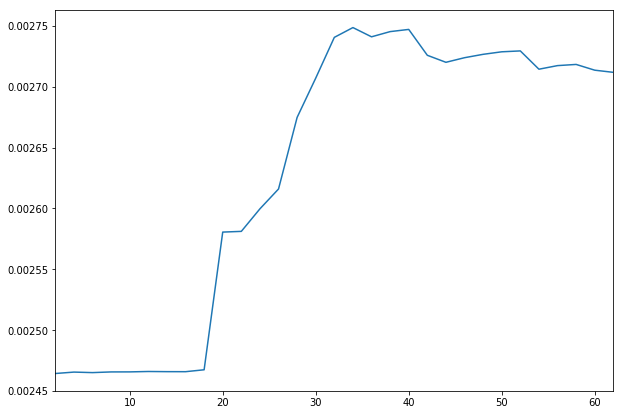

In [88]:
pd.Series(K_vs_Score, index= range(2, Xtrain.shape[1], 2)).plot(figsize=(10,7));

In [91]:
selector = SelectKBest(k=17, score_func=f_classif)

In [92]:
selector.fit(Xtrain, ytrain)

SelectKBest(k=17, score_func=<function f_classif at 0x7ff6e269c0d0>)

In [93]:
mask = selector.get_support()

In [94]:
type(Xval)

pandas.core.frame.DataFrame

In [95]:
Xval.columns[mask]

Index(['fl_mei', 'fl_optante_simples', 'fl_optante_simei', 'fl_passivel_iss',
       'qt_filiais', 'sg_uf_RO',
       'natureza_juridica_macro_ADMINISTRACAO PUBLICA',
       'natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS',
       'natureza_juridica_macro_OUTROS', 'setor_AGROPECUARIA',
       'setor_COMERCIO', 'setor_CONSTRUÇÃO CIVIL', 'setor_INDUSTRIA',
       'setor_SERVIÇO', 'setor_SETOR INDEFINIDO', 'sg_uf_matriz_RO',
       'sg_uf_matriz_SP'],
      dtype='object')